In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
from statsmodels.tsa.statespace.varmax import VARMAX

In [2]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
plt.rcParams["font.family"] = "Times New Roman"
plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-poster')
plt.style.use('seaborn-dark-palette')
plt.rcParams["mathtext.fontset"] = "cm"

In [3]:
def num_chamber(list_x, list_y):
    list_x = list_x.values
    list_y = list_y.values
    list_c = list()
    for i in range(len(list_x)):
        x = int(list_x[i])
        y = int(list_y[i])
        if (y > 178):
            list_c.append(5)
        else:
            if ((y <= 0)&(x <= 0)):
                list_c.append(5)
            else:
                if (y <= 46):
                    list_c.append(1)
                else:
                    if (y <= 92):
                        list_c.append(2)
                    else:
                        if (y <= 138):
                            list_c.append(3)
                        else:
                            list_c.append(4)
    return list_c  

In [4]:
def plot_time_series(ts_1, ts_label_1, ts_2, ts_label_2, title, path):
    assert len(ts_1) == len(ts_2)
    xs = list(range(0, len(ts_1)))

    plt.plot(xs, ts_1, c='green', label=ts_label_1)
    plt.plot(xs, ts_2, c='red', label=ts_label_2)

    plt.title(title)
    plt.legend(loc='upper left')
    plt.savefig(path)
    plt.show()

/Users/isabelle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/Users/isabelle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


      1
0     4
1     4
2     4
3     4
4     4
...  ..
2875  4
2876  4
2877  4
2878  4
2879  4

[2880 rows x 1 columns]


FileNotFoundError: [Errno 2] No such file or directory: '../figures/insect/1/x1.png'

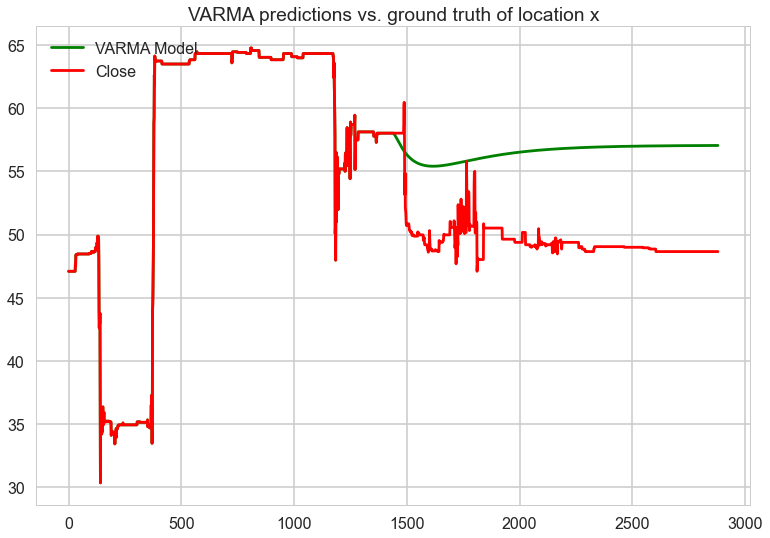

In [11]:
# Data Loading
data_df = pd.read_csv('../dataset/location_in_mm.csv')
c = [1, 74, 154]
amount_ant = [73, 80, 83]
pred = pd.DataFrame()
for colony_id in range(1, 4):

    for ant_id in range(amount_ant[colony_id-1]):
        #ant_id = 0
        colony = c[colony_id-1]
        data = data_df[(data_df['colony_id'] == colony_id) & (data_df['ant_id'] == ant_id)]

        num_ant = colony + ant_id
        data.reset_index(inplace = True)
        data = data[['location_x', 'location_y']]

        #creating the train and validation set
        valid = data[int(0.5*(len(data))):]
        train = data[:int(0.5*(len(data)))]
        """
        tmp = []
        for p in tqdm(range(5)):
            for q in tqdm(range(5)):
                try:
                    tmp.append([VARMAX(train, order = (p,q)).fit().bic, p, q])
                except:
                    tmp.append([None, p, q])
        tmp = pd.DataFrame(tmp,columns = ['bic', 'p', 'q'])
        print(tmp)
        order = tmp[tmp['bic'] == tmp['bic'].min()]
        print(order)
        """
        
        #try: 
        #model = VARMAX(train, order = (order['p'], order['q']))
        model = VARMAX(train, order = (4, 3))
        fitted_model = model.fit()
        prediction = fitted_model.forecast(len(valid)).reset_index(drop=True) 
        prediction = pd.DataFrame(prediction)
        prediction = pd.concat([train, prediction], axis = 0)

        prediction_c = num_chamber(prediction['location_x'], prediction['location_y'])
 
        pred[['%i'%num_ant]] = pd.DataFrame({"%i"%num_ant: prediction_c})
        print(pred)

        #plot_time_series(ts_1 = prediction_chamber, ts_label_1 = 'VARMA Model', ts_2 = valid['chamber'], ts_label_2 = 'Close', title = 'VARMA predictions vs. ground truth')
        plot_time_series(ts_1 = prediction['location_x'], ts_label_1 = 'VARMA Model', ts_2 = data['location_x'], ts_label_2 = 'Close', title = 'VARMA predictions vs. ground truth of location x', path = '../figures/insect/%i/x1.png'%num_ant)
        plot_time_series(ts_1 = prediction['location_y'], ts_label_1 = 'VARMA Model', ts_2 = data['location_y'], ts_label_2 = 'Close', title = 'VARMA predictions vs. ground truth of location y', path = '../figures/insect/%i/y1.png'%num_ant)

        pred.to_csv('../dataset/pred_noloop.csv', index = False)  
        #except Exception as reason:
        #    print('%i'%num_ant, reason)      
 